In [2]:
import pandas as pd
%pip install matplotlib
%pip install geopandas
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/23.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/23.6 MB 5.9 MB/s eta 0:00:04
   ---- ----------------------------------- 2.4/23.6 MB 6.0 MB/s eta 0:00:04
   ----- ---------------------------------- 3.4/23.6 MB 5.7 MB/s eta 0:00:04
   ------- -------------------------------- 4.2/23.6 MB 5.3 MB/s eta 0:00:04
   -------- ------------------------------- 5.2/23.6 MB 5.3 MB/s eta 0:00:04
   ----------- ---------------------------- 6.8/23.6 MB 5.5 MB/s eta 0:00:04
   ------------- -------------------------- 8.1/23.6 MB 5.7 MB/s eta 0:00:03
   --------------- ------------------------ 8.9/23.6 MB 5.8 MB/s eta 0:00:03
   ---------------- ----------------------- 9.7/23.6 MB 5.3 MB/s eta 0:00:03
   ----------------- ---------------------- 10.2/23.6 MB 5.1 MB/s eta 0:00:03
   ------------------- -------------------- 11.3/23.6 MB 5.0 MB/s eta 0:00:03
   --------------------- ------------------ 12.6/23.6 MB 5.2 MB/s eta 0:00:03
   

Carichiamo i dati dei file CSV relativi ai characters e controlliamo che il caricamento sia avvenuto correttamente.

In [3]:
characterAW_df = pd.read_csv('character_anime_works.csv')
characterAW_df = characterAW_df.drop(columns=['character_name'])
characterAW_df.head()
characterNN_df = pd.read_csv('character_nicknames.csv')
characterNN_df.head()
character_df = pd.read_csv('characters.csv')
character_df = character_df.drop(columns=['url', 'name_kanji', 'image', 'about'])
character_df.head()
# Merge sequentially (fix typo 'hoew' -> 'how' and don't pass three dataframes to pd.merge)
character_df = pd.merge(character_df, characterAW_df, on='character_mal_id', how='left')
character_df = pd.merge(character_df, characterNN_df, on='character_mal_id', how='left')
character_df.drop_duplicates(subset=['character_mal_id'], inplace=True)
character_df.head()

,character_mal_id,name,favorites,anime_mal_id,role,nickname
0,280386.0,Envi Mel Champagne,0.0,59846.0,Supporting,NaN
1,280354.0,Eleven,0.0,60071.0,Supporting,NaN
2,280353.0,Stud,0.0,60071.0,Supporting,NaN
3,280352.0,Judge,0.0,60071.0,Supporting,NaN
4,280339.0,Eiji Kurokawa,0.0,60531.0,Supporting,NaN


Grazie ai dati contenuti in questi file, che abbiamo unito per dare più contesto e profondità ai dati, possiamo ricavare informazioni interessanti sui personaggi del mondo anime.
Come prima domanda abbiamo pensato di chiederci quali sono i 5 personaggi più amati dal pubblico. 

In [4]:
top5 = character_df.nlargest(5, 'favorites')
top5

,character_mal_id,name,favorites,anime_mal_id,role,nickname
321863,417.0,Lelouch Lamperouge,175632.0,56835.0,Supporting,Lelouch vi Britannia
324813,40.0,Luffy Monkey D.,145750.0,52139.0,Main,Mugiwara
230905,45627.0,Levi,144452.0,16498.0,Supporting,NaN
324292,71.0,L Lawliet,129333.0,1535.0,Main,Ryuga Hideki
324443,62.0,Zoro Roronoa,114319.0,52139.0,Main,Pirate Hunter


Vediamo nella tabella contenente i dati estratti che il personaggio più amato è "Lelouch Lamperouge" del quale sappiamo il suo nick name, per quanti utenti è un personaggio preferito, in quale anime è presente e dato più interessante a nostro parere possiamo vedere che è un personaggio secondario.
Questa però era solo una curiosità che ci è servita per prendere confidenza con i dati che stiamo analizzando, la prima domanda più interessante è la seguente: negli anime quanti protagonisti ci sono? e quanti sono in proporzione ai personaggi di supporto?

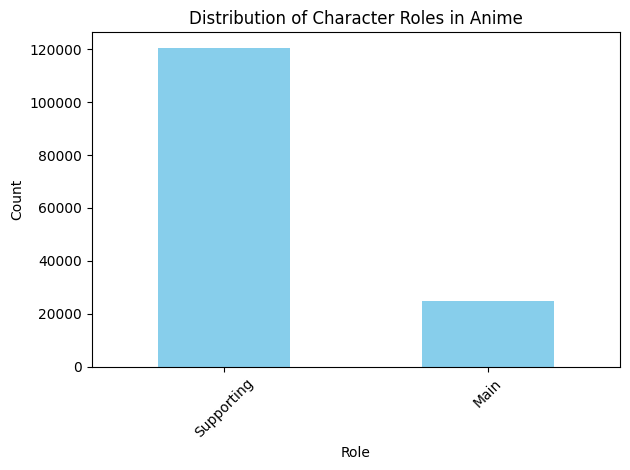

In [5]:
character_df['role'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Distribution of Character Roles in Anime')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Come possiamo vedere i personaggi secondari sono tantissimi in confronto ai protagonisti, questo però è un dato perfettamente logico, ci serve unicamente per chiederci una nuova domanda, prettamente per curiosita.
Nel mondo anime tra i 100 personaggi più amati dal pubblico ci sono più protagonisti o personaggi secondari?

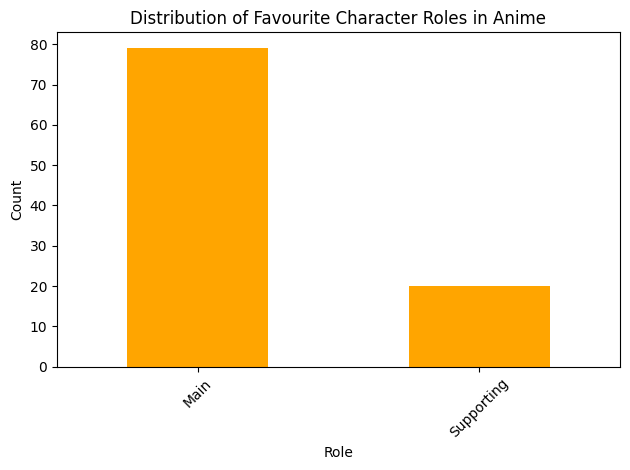

In [6]:
top100 = character_df.nlargest(100, 'favorites')
top100['role'].value_counts().plot(kind='bar', color='orange')

plt.title('Distribution of Favourite Character Roles in Anime')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Come potevamo aspettarci se prendiamo a campione i 100 personaggi più amati del mondo anime sono per circa l'80% protagonisti.
Questa breve analisi sui dati non ci lascia soropresi in quanto rispecchia le aspettative che avevamo prima di approcciare i dati nel concreto; i personaggi secondari sono ovviamente tantissimi rispetto ai protagonisti ma sono gli utlimo a essere i più amati dal pubblico.

Adesso che abbiamo visto qualche curiosità sui personaggi, perchè non farci anche delle domande sugli anime in cui appaiono questi personaggi?
Iniziamo caricando i dati dei file CSV relativi agli anime e controlliamo che il caricamento sia avvenuto correttamente.

In [ ]:
details_df = pd.read_csv('details.csv')
pd.set_option('display.max_columns', None)
details_df = details_df.drop(columns=['url', 'image_url', 'synopsis', 'members', 'themes', 'demographics', 'rating', 'explicit_genres', 'licensors', 'streaming'])
details_df.head()

,mal_id,title,title_japanese,url,image_url,type,status,score,scored_by,start_date,end_date,synopsis,rank,popularity,members,favorites,genres,studios,themes,demographics,source,rating,episodes,season,year,producers,explicit_genres,licensors,streaming
0,59356,-Socket-,-socket-,https://myanimelist.net/anime/59356/-Socket-,https://cdn.myanimelist.net/images/anime/1043/...,Movie,Finished Airing,NaN,NaN,2010-01-01T00:00:00+00:00,NaN,A girl with a cord growing out of her back wan...,17086.0,22507,195,0,['Comedy'],[],[],[],Original,G - All Ages,1.0,NaN,NaN,['Nagoya Zokei University'],[],[],[]
1,56036,......,......,https://myanimelist.net/anime/56036/-,https://cdn.myanimelist.net/images/anime/1057/...,Music,Finished Airing,6.53,503.0,2023-06-11T00:00:00+00:00,NaN,Music video directed by obmolot for the song ....,NaN,15004,941,2,"['Horror', 'Supernatural']",['Flat Studio'],['Music'],[],Original,PG-13 - Teens 13 or older,1.0,NaN,NaN,[],[],[],[]
2,2928,.hack//G.U. Returner,.HACK//G.U. RETURNER,https://myanimelist.net/anime/2928/hack__GU_Re...,https://cdn.myanimelist.net/images/anime/1798/...,OVA,Finished Airing,6.65,9745.0,2007-01-18T00:00:00+00:00,NaN,The characters from previous .hack//G.U. Games...,6366.0,5056,22525,31,"['Adventure', 'Drama', 'Fantasy']",['Bee Train'],['Video Game'],[],Game,PG-13 - Teens 13 or older,1.0,NaN,NaN,"['Bandai Visual', 'CyberConnect2']",[],[],[]
3,3269,.hack//G.U. Trilogy,.hack//G.U. Trilogy,https://myanimelist.net/anime/3269/hack__GU_Tr...,https://cdn.myanimelist.net/images/anime/1566/...,Movie,Finished Airing,7.06,15373.0,2007-12-22T00:00:00+00:00,NaN,"Based on the CyberConnect2 HIT GAME, now will ...",4194.0,4215,34264,104,"['Action', 'Fantasy']",['CyberConnect2'],['Video Game'],[],Game,PG-13 - Teens 13 or older,1.0,NaN,NaN,['Bandai Visual'],[],"['Funimation', 'Bandai Entertainment']",[]
4,4469,.hack//G.U. Trilogy: Parody Mode,.hack//G.U. Trilogy,https://myanimelist.net/anime/4469/hack__GU_Tr...,https://cdn.myanimelist.net/images/anime/10/86...,Special,Finished Airing,6.35,4317.0,2008-03-25T00:00:00+00:00,NaN,A special bonus Parody Mode added to the extra...,8182.0,6696,11135,10,"['Comedy', 'Fantasy', 'Sci-Fi']",[],"['Parody', 'Video Game']",[],Game,PG-13 - Teens 13 or older,1.0,NaN,NaN,['Bandai Visual'],[],[],[]


In [9]:
details_df = pd.read_csv('details.csv')
pd.set_option('display.max_columns', None)
details_df = details_df.drop(columns=['url', 'image_url', 'synopsis', 'members', 'themes', 'demographics', 'source','rating', 'explicit_genres', 'licensors', 'streaming'])
details_df.head()

,mal_id,title,title_japanese,type,status,score,scored_by,start_date,end_date,rank,popularity,favorites,genres,studios,episodes,season,year,producers
0,59356,-Socket-,-socket-,Movie,Finished Airing,NaN,NaN,2010-01-01T00:00:00+00:00,NaN,17086.0,22507,0,['Comedy'],[],1.0,NaN,NaN,['Nagoya Zokei University']
1,56036,......,......,Music,Finished Airing,6.53,503.0,2023-06-11T00:00:00+00:00,NaN,NaN,15004,2,"['Horror', 'Supernatural']",['Flat Studio'],1.0,NaN,NaN,[]
2,2928,.hack//G.U. Returner,.HACK//G.U. RETURNER,OVA,Finished Airing,6.65,9745.0,2007-01-18T00:00:00+00:00,NaN,6366.0,5056,31,"['Adventure', 'Drama', 'Fantasy']",['Bee Train'],1.0,NaN,NaN,"['Bandai Visual', 'CyberConnect2']"
3,3269,.hack//G.U. Trilogy,.hack//G.U. Trilogy,Movie,Finished Airing,7.06,15373.0,2007-12-22T00:00:00+00:00,NaN,4194.0,4215,104,"['Action', 'Fantasy']",['CyberConnect2'],1.0,NaN,NaN,['Bandai Visual']
4,4469,.hack//G.U. Trilogy: Parody Mode,.hack//G.U. Trilogy,Special,Finished Airing,6.35,4317.0,2008-03-25T00:00:00+00:00,NaN,8182.0,6696,10,"['Comedy', 'Fantasy', 'Sci-Fi']",[],1.0,NaN,NaN,['Bandai Visual']


idee: migiori score/rank, anime piu votati (scored by), top generi, quali studi hanno prodotto di piu, gli anime con piu episodi, in quela stagione (season) escono di piu gli anime e anche per l'anno.